In [ ]:
#Connect to Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Data Wrangling

#### Data Visualization - Understand, Find patterns and Clean Data 

In [111]:
#Import libraries
import pandas as pd
import matplotlib.pyplot as plt


In [112]:
#Access and read data into a pandas dataframe
dataset_path = '/content/drive/MyDrive/F_Expr/fer2013.csv'
df = pd.read_csv(dataset_path)

print ('Data read into a pandas dataframe!')

Data read into a pandas dataframe!


In [113]:
#Display the top 5 rows of the dataframe
df.head()

emotion                                             pixels     Usage
0        0  70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...  Training
1        0  151 150 147 155 148 133 111 140 170 174 182 15...  Training
2        2  231 212 156 164 174 138 161 173 182 200 106 38...  Training
3        4  24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...  Training
4        6  4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...  Training

In [114]:
#Get basic information about the dataframe
df.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35887 entries, 0 to 35886
Columns: 3 entries, emotion to Usage
dtypes: int64(1), object(2)
memory usage: 841.2+ KB


In [115]:
#Get column headers
df.columns

Index(['emotion', 'pixels', 'Usage'], dtype='object')

In [116]:
#Get dimensions of the datframe
df.shape

(35887, 3)

In [117]:
#Number of samples in each class
classes = {0:'Anger', 1:'Disgust', 2:'Fear', 3:'Happy', 4:'Sad', 5:'Surprise', 6:'Neutral'}

display_classes = df['emotion'].value_counts(sort=False).reset_index()
display_classes.columns = ['emotion', 'Number of samples']
display_classes['emotion'] = display_classes['emotion'].map(classes)

print(display_classes)

    emotion  Number of samples
0     Anger               4953
1   Disgust                547
2      Fear               5121
3     Happy               8989
4       Sad               6077
5  Surprise               4002
6   Neutral               6198


Some classes are less represented than others. For example the emotion 'Disgust' includes only 547 sample points. Therefore to create a more robust model, less represented classes will be removed. Also, for the scope of this project more categories will be removed as the main emotions that will be used from users are the following: 

1. Happy
2. Sad
3. Angry
4. Neutral

In [118]:
#Keep only relevant data
df = df[df['emotion'].isin([0,3,4,6])]

In [119]:
#Re index classes
df['emotion'].replace({3: 1, 4: 2, 6: 3}, inplace=True)

In [120]:
#Print classes in updated dataframe
df['emotion'].value_counts()

1    8989
3    6198
2    6077
0    4953
Name: emotion, dtype: int64

In [121]:
#Updated sample number
df.shape

(26217, 3)

In [122]:
#Number of samples for each set
df['Usage'].value_counts()

Training       21005
PublicTest      2622
PrivateTest     2590
Name: Usage, dtype: int64

In [123]:
#Reset column index to get numbers back from 1-end 
df = df.reset_index(drop=True)

In [124]:
#Seperate sets (into new df)
train_set = df[df['Usage'] == 'Training'].copy()
val_set = df[df['Usage'] == 'PublicTest'].copy()
test_set = df[df['Usage'] == 'PrivateTest'].copy()

In [125]:
#Display train_set shape
train_set.shape

(21005, 3)

In [126]:
#Display val_set shape
val_set.shape

(2622, 3)

In [127]:
#Display test_set shape
test_set.shape

(2590, 3)

In [128]:
#Check if there are any missing values
df.isnull().sum()

emotion    0
pixels     0
Usage      0
dtype: int64

The data has been cleaned and are ready to be preprocessed before feeding them to a model.
But we will continue with Data Visualization.

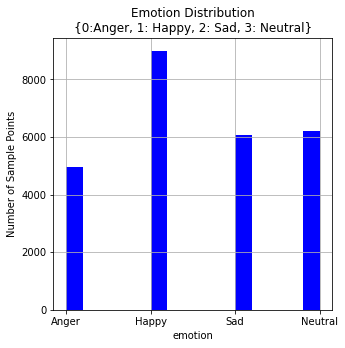

In [134]:
df.hist(bins=15, figsize=(5,5), color='b')
plt.title('Emotion Distribution\n{0:Anger, 1: Happy, 2: Sad, 3: Neutral}', loc='center')
plt.xticks(np.arange(4),('Anger', 'Happy', 'Sad', 'Neutral'))
plt.xlabel('emotion')
plt.ylabel('Number of Sample Points')
plt.show()

**Notes:**  There is a strong representation of the emotion 'Happy'. Which probably will translate into a better accuracy on this specific class, after training. Emotions 'Sad' and 'Neutral', followed by 'Anger', include fewer samples but enough to provide a good accuracy. 

All that will be confirmed after training a model on the data.

